## Label distributions

This notebook is to check for irregular distribution of the training data, in which case we may want to engineer the training data to have a more uniform distribution.

In [60]:
import matplotlib.pyplot as plt
import numpy as np

from typing import Dict, List

In [61]:
train_data_file_path = "../../data/train.txt"

def get_labels(file_path: str) -> List[str]:
    with open(train_data_file_path, "r") as train_data_file:
        return [line.split(" ")[0] for line in train_data_file.readlines()]


def get_label_counts(labels: List[str]) -> Dict[str, int]:
    label_count_dict = {}
    
    for label in labels:
        label_count_dict[label] = label_count_dict[label] + 1 if label in label_count_dict else 0
        
    return label_count_dict
    
labels = get_labels(train_data_file_path)
label_counts = get_label_counts(labels)

print(f'Labels: \n\n{list(label_counts.keys())}')
print("\n\n")
print(f'# labels: {len(label_counts.keys())}')


Labels: 

['DESC:manner', 'ENTY:cremat', 'ENTY:animal', 'ABBR:exp', 'HUM:ind', 'HUM:gr', 'HUM:title', 'DESC:def', 'NUM:date', 'DESC:reason', 'ENTY:event', 'LOC:state', 'DESC:desc', 'NUM:count', 'ENTY:other', 'ENTY:letter', 'LOC:other', 'ENTY:religion', 'ENTY:food', 'LOC:country', 'ENTY:color', 'ENTY:termeq', 'LOC:city', 'ENTY:body', 'ENTY:dismed', 'LOC:mount', 'NUM:money', 'ENTY:product', 'NUM:period', 'ENTY:substance', 'ENTY:sport', 'ENTY:plant', 'ENTY:techmeth', 'NUM:volsize', 'HUM:desc', 'ENTY:instru', 'ABBR:abb', 'NUM:other', 'NUM:speed', 'ENTY:word', 'ENTY:lang', 'NUM:perc', 'NUM:code', 'NUM:dist', 'NUM:temp', 'ENTY:symbol', 'NUM:ord', 'ENTY:veh', 'NUM:weight', 'ENTY:currency']



# labels: 50


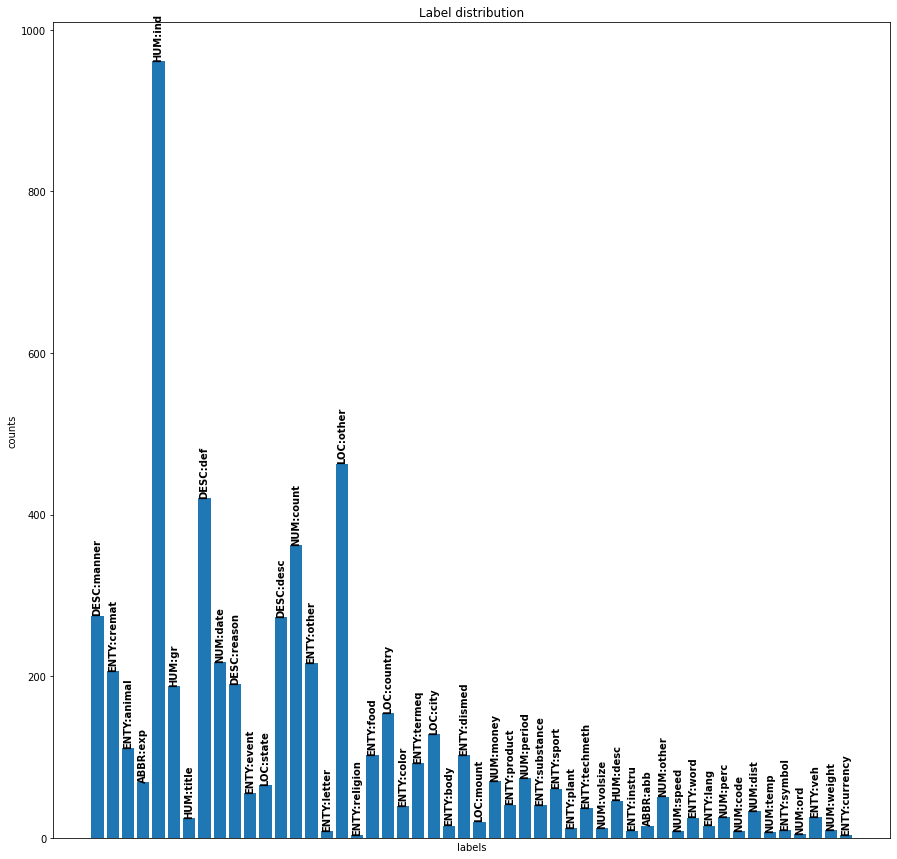

In [64]:
plt.figure(figsize=(15,15))


n = list(label_counts.keys())
s = list(label_counts.values())

plt.bar(n, s)
plt.ylabel('counts')
plt.xlabel('labels');
plt.xticks([])
plt.title("Label distribution")
for i in range(len(s)):
    plt.annotate(str(n[i]), xy=(n[i],s[i]), ha='center', va='bottom', rotation='vertical', fontweight='bold')
    
plt.show()

There is a very irregular distribution. The HUM:ind class has a relatively high distribution. There are also quite a few dataclasses for which we have very few training examples. Below we'll plot the sorted distribution for easier reading.

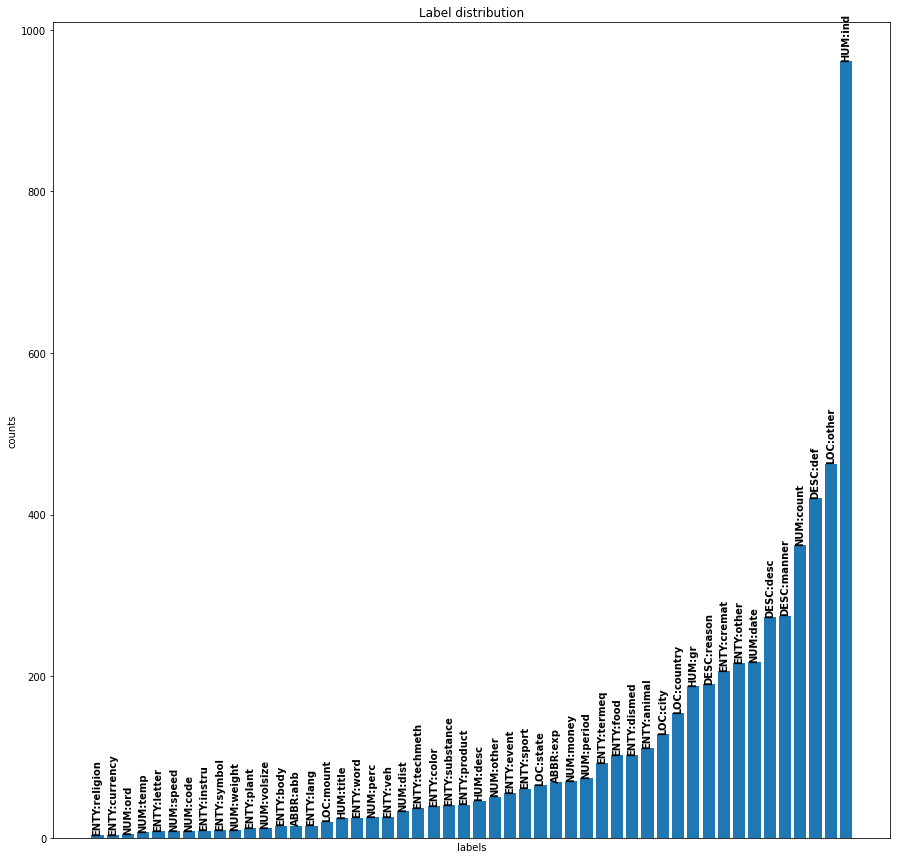

In [67]:
plt.figure(figsize=(15,15))


label_counts_sorted = dict(sorted(label_counts.items(), key=lambda item: item[1]))

n = list(label_counts_sorted.keys())
s = list(label_counts_sorted.values())

plt.bar(n, s)
plt.ylabel('counts')
plt.xlabel('labels');
plt.xticks([])
plt.title("Label distribution")
for i in range(len(s)):
    plt.annotate(str(n[i]), xy=(n[i],s[i]), ha='center', va='bottom', rotation='vertical', fontweight='bold')
    
plt.show()

In [59]:
from copy import deepcopy
label_count_values = np.array(list(label_counts.values()))
print(f'Mean label count: {np.mean(label_count_values)}')
print(f'Median label count: {np.median(label_count_values)}')


Mean label count: 108.04
Median label count: 43.5


## Conclusion

We will add options to our pre-processing steps to up/under-sample the training data to the mean and/or median and investigate the effects of re-sampling on classifier performance.